<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Prophet applied to car sale forecasting



# What is Prophet?
<hr style = "border:2px solid black" ></hr>


- Open-source for **univariate** (one variable) time series forecasting
- Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.
- It is designed to be easy and completely automatic, e.g. point it at a time series and get a forecast.



# Imports
<hr style = "border:2px solid black" ></hr>

In [5]:
# Pandas future warning
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
from pandas import DataFrame
from pandas import to_datetime
from pandas import read_csv
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from fbprophet import Prophet
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


# Import dataset
<hr style = "border:2px solid black" ></hr>


- We will use the monthly car sales dataset.
- It is a standard univariate time series dataset that contains both a trend and seasonality. The dataset has 108 months of data and a naive persistence forecast can achieve a mean absolute error of about 3,235 sales, providing a lower error limit.



In [16]:
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


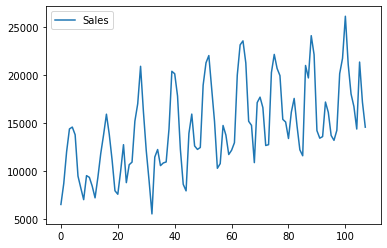

In [17]:
# plot the time series
df.plot()
pyplot.show()

# Modelling
<hr style = "border:2px solid black" ></hr>

In [18]:
df.columns = ['ds', 'y']
df['ds'] = to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# In-sample prediction
<hr style = "border:2px solid black" ></hr>


- It can be useful to make a forecast on historical data.

- That is, we can make a forecast on data used as input to train the model. Ideally, the model has seen the data before and would make a perfect prediction.

- Nevertheless, this is not the case as the model tries to generalize across all cases in the data.

- This is called making an in-sample (in training set sample) forecast and reviewing the results can give insight into how good the model is. That is, how well it learned the training data.
    
- We can see that the forecasted 12 months is a good match for the real observations, especially when the bounds are taken into account.



          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14363.556656  12836.803456  15872.452484
1 1968-02-01  14929.449809  13386.796404  16463.847526
2 1968-03-01  20893.417179  19287.000377  22457.690017
3 1968-04-01  22910.515245  21340.089640  24466.292432
4 1968-05-01  24200.784363  22515.540580  25692.469714


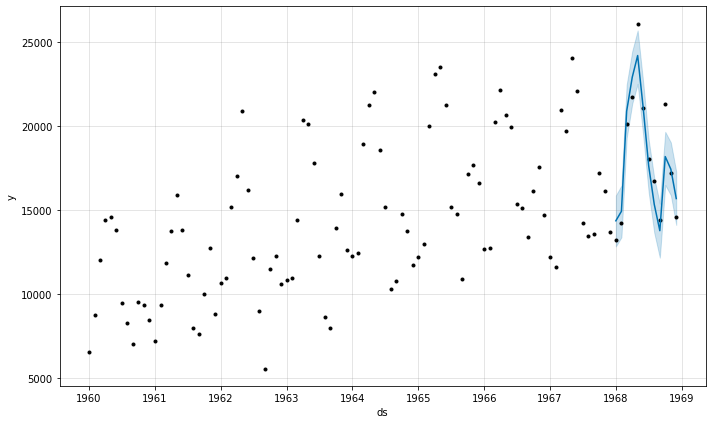

In [21]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

# Out-sample prediction
<hr style = "border:2px solid black" ></hr>


- In practice, we really want a forecast model to make a prediction beyond the training data.

- This is called an out-of-sample forecast.

- We can achieve this in the same way as an in-sample forecast and simply specify a different forecast period.

- In this case, a period beyond the end of the training dataset, starting 1969-01.

- The result looks sensible, but **it is hard** to get an idea of whether they are sensible or not.



In [22]:
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15430.055568  13802.972625  16872.072122
1 1969-02-01  16206.859137  14677.440996  17909.439813
2 1969-03-01  21407.960484  19854.164152  22965.562081
3 1969-04-01  23530.369039  21907.113067  25051.180090
4 1969-05-01  25036.901537  23417.620518  26608.217463


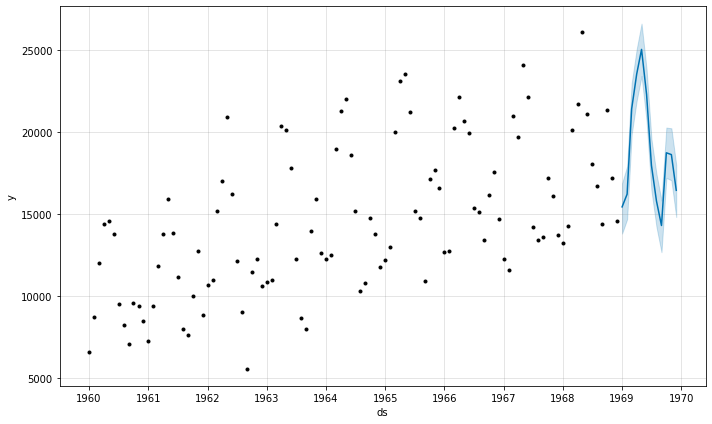

In [23]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

# Validation
<hr style = "border:2px solid black" ></hr>


- How can we develop an objective estimate of a forecast model’s performance?

- This can be achieved by holding some data back from the model, such as the last 12 months. Then, fitting the model on the first portion of the data, using it to make predictions on the held-pack portion, and calculating an error measure, such as the mean absolute error across the forecasts. E.g. a simulated out-of-sample forecast.

- The score gives an **estimate of how well we might expect the model to perform on average** when making an out-of-sample forecast.

- We can do this with the samples data by creating a new DataFrame for training with the last 12 months removed.

- In this case we can see that the error is approximately 1,336 sales, which is much lower (better) than a naive persistence model that achieves an error of 3,235 sales over the same period.



In [28]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


MAE: 1336.814


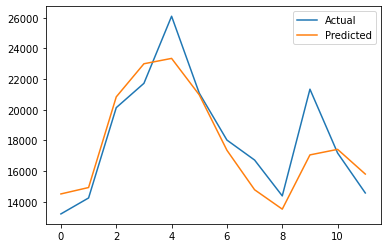

In [29]:
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

# References
<hr style = "border:2px solid black" ></hr>


- https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
- [Monthly Car Sales Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv)
- [Monthly Car Sales Dataset Description](https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.names)

